In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image

base_path = '/home/turbotage/Documents/4DRecon/'

In [156]:
with h5py.File(base_path + 'background_corrected.h5', 'r') as f:
    corrected_img = f['corrected_img'][:]
    vel_img = f['vel'][:]

vel_img = np.sqrt(np.sum(np.square(vel_img), axis=1))

In [159]:
corrected_img = np.abs(corrected_img)

imgvec = []
velvec = []
for i in range(0, corrected_img.shape[0], 3):
    imgvec.append(corrected_img[i,0,...])
    velvec.append(vel_img[i,...])


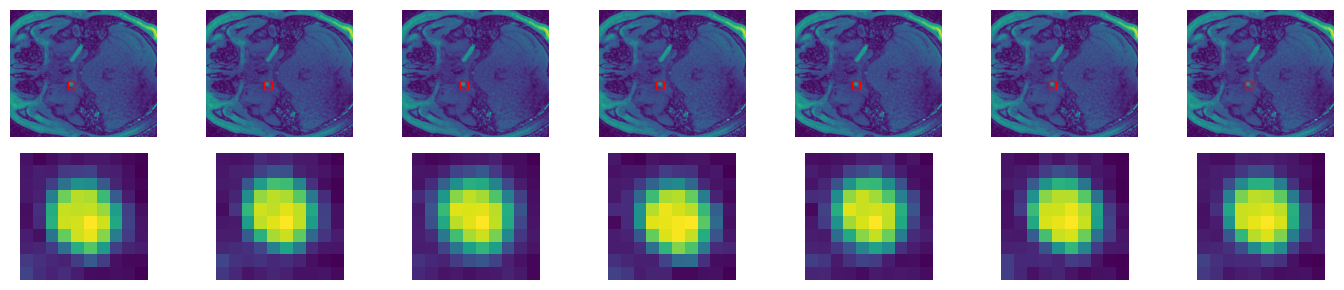

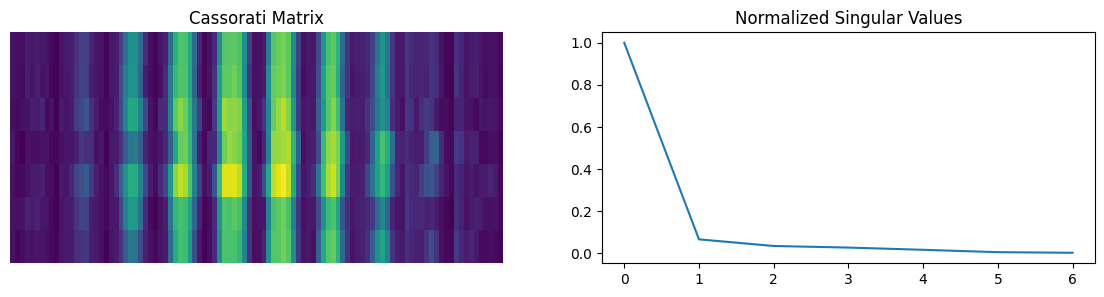

In [162]:
plt.rcParams['figure.figsize'] = [14, 3]

fig, ax = plt.subplots(2, len(imgvec))
newimgs = []
newcropimgs = []
for i in range(len(imgvec)):
    nimg = imgvec[i][70:235,40:230,170] #+ velvec[i][70:235,40:230,170]
    vimg = velvec[i][70:235,40:230,170]
    #nimg += 1e-3*np.random.rand(*nimg.shape).astype(np.float32)
    newimgs.append(nimg)
    ax[0,i].imshow(nimg)
    ax[0,i].axis('off')
    ax[0,i].add_patch(patches.Rectangle((74,92), 10, 10, linewidth=1,
            edgecolor='r', facecolor='none'))
    

    nx = 92 + np.random.randint(-1, 1)
    ny = 74 + np.random.randint(-1, 1)
    nlen = 10
    nimgcrop = (0.9*nimg[nx:(nx+nlen),ny:(ny+nlen)] + vimg[nx:(nx+nlen),ny:(ny+nlen)]) / 5
    
    for _ in range(8):
        nx = 92 + np.random.randint(-1, 1)
        ny = 74 + np.random.randint(-1, 1)
        nlen = 10
        nimgcrop += (0.9*nimg[nx:(nx+nlen),ny:(ny+nlen)] + vimg[nx:(nx+nlen),ny:(ny+nlen)]) / 5
    
    ax[1,i].imshow(nimgcrop)
    ax[1,i].axis('off')
    newcropimgs.append(nimgcrop.flatten())

    del nimg, vimg, nimgcrop

fig.tight_layout()
#fig.show()
plt.show()

newcropimgs = np.stack(newcropimgs, axis=1)

fig, ax = plt.subplots(1,2)
ax[0].pcolormesh(newcropimgs.transpose())
#plt.tight_layout()
ax[0].axis('off')
ax[0].set_xlabel('Flattened Spatial Dimension')
ax[0].set_ylabel('Temporal Dimension')
ax[0].set_title('Cassorati Matrix')
#fig.show()

u, s, vh = np.linalg.svd(newcropimgs, full_matrices=False)
ax[1].plot(s / max(s))
#ax[1].axis('off')
ax[1].set_title('Normalized Singular Values')


plt.show()
